### Importing dataset from kaggle

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.0k [00:00<?, ?B/s]
100% 48.0k/48.0k [00:00<00:00, 18.2MB/s]


In [7]:
!unzip /content/breast-cancer-wisconsin-data.zip 

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


***Great Let's begin***

### Load the dataset

In [0]:
import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from keras.optimizers import adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('/content/data.csv')
print(data.shape)
data.head(5)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
drop_columns = [data.columns[0], data.columns[-1]]
print(f'Dropping columns {drop_columns}')
data.drop(drop_columns, axis = 1, inplace=True)
print(data.shape)

Dropping columns ['id', 'Unnamed: 32']
(569, 31)


***So there are only 569 examples in the dataset. So we will keep 100 of them for the test set leaving 469 for training. Which is quite less, hence chances of the model overfitting the training set exists.***
 
 Let's seee

### Data Preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
train_data, test_data = train_test_split(data, test_size = (100/569), random_state = 25)
print(train_data.shape)
print(test_data.shape)

(469, 31)
(100, 31)


In [98]:
x_train, y_train = train_data.values[:, 1:], train_data.values[:,0]
x_test, y_test = test_data.values[:,1:], test_data.values[:,0]
print('Shape of X_train', x_train.shape)
print('Shape of Y_train', y_train.shape)
print('Shape of X_test', x_test.shape)
print('Shape of Y_test', y_test.shape)

Shape of X_train (469, 30)
Shape of Y_train (469,)
Shape of X_test (100, 30)
Shape of Y_test (100,)


In [99]:
#turning the B and M to 0, 1 in output labels
def binarise_output(Y):
    y_return = np.zeros(Y.shape)
    indices = np.where(Y == 'M')
    y_return[indices] = 1
    return y_return

Y_train, Y_test = binarise_output(y_train), binarise_output(y_test)

print(y_train[:10,...])
print(Y_train[:10,...])
print('-'*10)
print(y_test[:10,...])
print(Y_test[:10,...])

['M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B']
[1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
----------
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test  = scaler.transform(x_test)

### Model Training and Evaluation

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(units = 64, input_dim = 30, activation='relu'))
    model.add(Dense(units = 50, activation = 'relu'))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer= 'rmsprop' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model

In [0]:
model = create_model()
history = model.fit(X_train, Y_train, batch_size = 64,epochs = 40, verbose = 0)

In [123]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 3ms/step


[0.3887685794499561, 0.96]

### Model with dropouts

In [0]:
def create_model_with_dropout():
    model = Sequential()
    #Dense layer
    model.add(Dense(units = 64, input_dim = 30, activation='relu'))
    #Dropout layer
    model.add(Dropout(rate = 0.2))
    #Dense layer
    model.add(Dense(units = 50, activation = 'relu'))
    #Dropout layer
    model.add(Dropout(rate = 0.2))
    #Dense layer
    model.add(Dense(units = 8, activation = 'relu'))
    #Dropout layer
    model.add(Dropout(rate = 0.2))
    #Output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer= 'rmsprop' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model

In [0]:
model2 = create_model_with_dropout()
history2 = model2.fit(X_train, Y_train, batch_size = 64, epochs = 40, verbose = 0)

In [130]:
model2.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 4ms/step


[0.288706998154521, 0.97]

***An increase in accuracy by 1% on the test dataset as compared with the model without Dropout layers.***

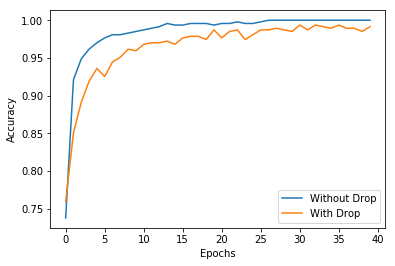

In [133]:
train_acc = history.history['acc']
train_acc_drop = history2.history['acc']

plt.plot(np.arange(len(train_acc)), train_acc, label='Without Drop')
plt.plot(np.arange(len(train_acc_drop)), train_acc_drop, label = 'With Drop')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()